# Warp Image

As it stands I havent looked into differentiable spline interpoliation for warping an image, as described in the paper. However I foudn this warping script which does the job nicely.

https://github.com/scikit-image/scikit-image/issues/2429

I've prepared an example below to see how it works.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import PiecewiseAffineTransform, warp
from skimage import data
import pandas as pd
from scipy.interpolate import Rbf
import cv2

In [2]:
class PointsRBF:
    def __init__(self, src, dst):
        xsrc = src[:,0]
        ysrc = src[:,1]
        xdst = dst[:,0]
        ydst = dst[:,1]
        self.rbf_x = Rbf( xsrc, ysrc, xdst)
        self.rbf_y = Rbf( xsrc, ysrc, ydst)

    def __call__(self, xy):
        x = xy[:,0]
        y = xy[:,1]
        xdst = self.rbf_x(x,y)
        ydst = self.rbf_y(x,y)
        return np.transpose( [xdst,ydst] )

def warpRBF(image, src, dst):
    prbf = PointsRBF( dst, src)
    warped = warp(image, prbf)
    warped = 255*warped                         # 0..1 => 0..255
    warped = warped.astype(np.uint8)            # convert from float64 to uint8
    return warped

coords.csv contains 70 facial landmarks for the image 'Aamir_Khan_r_4.jpg' we will take the landmark ids which represent the jawline and transform them by 20 pixels in the y plane. This should have the effect of stretching the jawline.

In [3]:
# jawline landmark ids
jawline_landmark_ids = [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 
                        28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 
                        43, 44, 45, 46, 47, 48, 49, 50, 51, 52]

# read csv with coords
df = pd.read_csv('coords.csv', index_col=0)

# empty lists for from and to coords (for warping)
coords_from = []
coords_to = []

# add landmark coords used for warping, transforming jawline of tuple by 20 pixels
for i, coord in enumerate(df.loc['Aamir_Khan_r_4.jpg'].to_numpy().reshape(70,2)):
    x_from = int(coord[0])
    y_from = int(coord[1])
    
    coords_from.append((x_from, y_from))
    
    if i in jawline_landmark_ids:
        x_to = int(coord[0])
        y_to = int(coord[1]) + 20
        
    else:
        x_to = int(coord[0])
        y_to = int(coord[1]) + 1
        
    coords_to.append((x_to,y_to))
    
    
# add boundary points
coords_from.append((0,0))
coords_from.append((256,256))
coords_from.append((256,0))
coords_from.append((0,256))
coords_from.append((0,128))
coords_from.append((128,0))
coords_to.append((0,0))
coords_to.append((256,256))
coords_to.append((256,0))
coords_to.append((0,256))
coords_to.append((0,128))
coords_to.append((128,0))
    
# convert to array    
coords_to = np.array(coords_to)
coords_from = np.array(coords_from)

# import image
img = cv2.imread('Aamir_Khan_r_4.jpg')

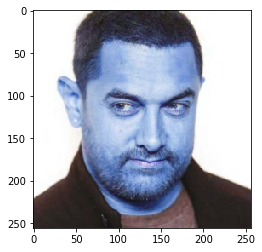

In [4]:
# show undeformed image
plt.imshow(img);

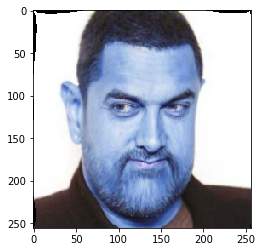

In [5]:
# show deformed image
plt.imshow(warpRBF(img, coords_from, coords_to));